Практична робота №6

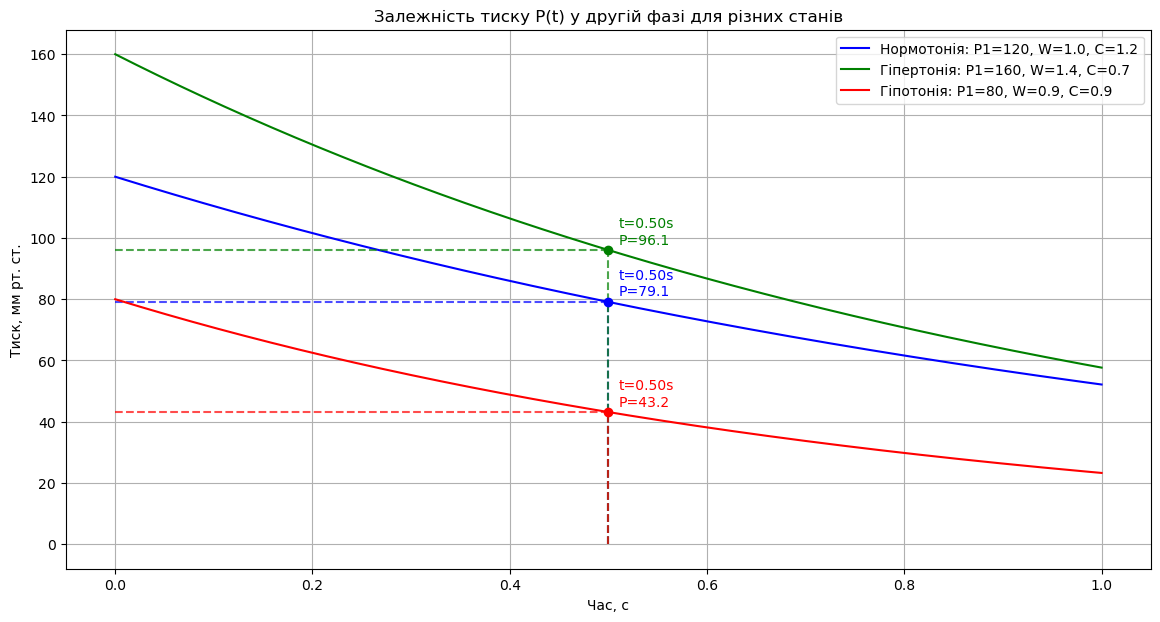

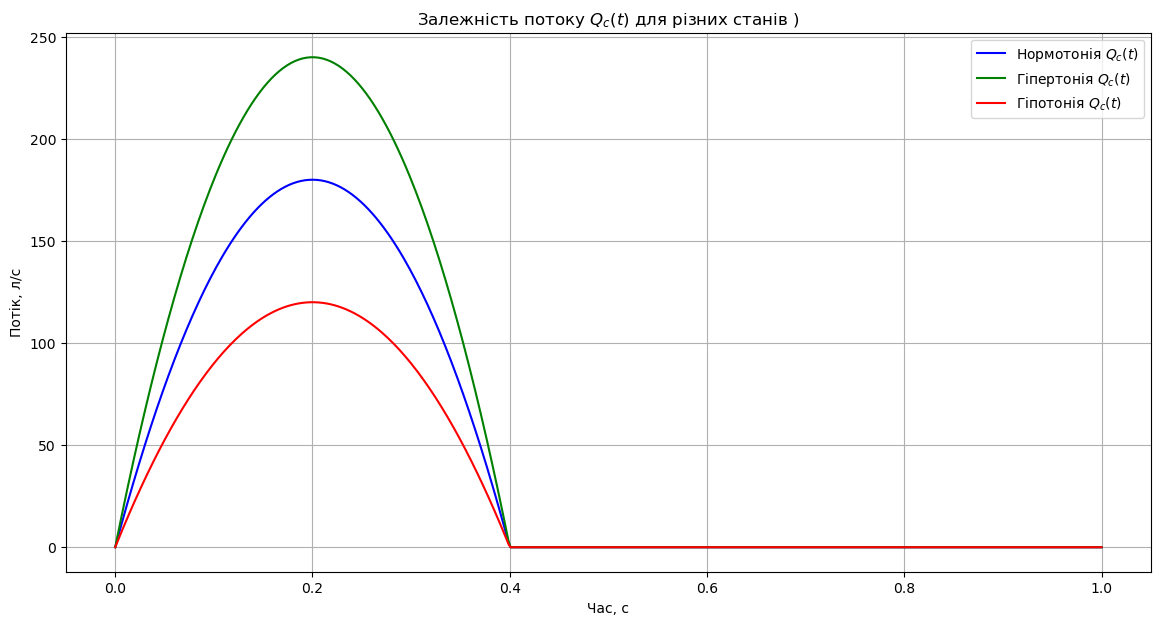

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

def pressure_second_phase(t, P1, W, C):
    return P1 * np.exp(-t / (W * C))

def flow_rate(t, Qmax, t0):
    a = Qmax / t0**2
    b = 2 * Qmax / t0
    return -a * t**2 + b * t

k = 1.5

scenarios = {
    "Нормотонія": {"P1": 120, "W": 1.0, "C": 1.2, "t0": 0.2, "color": "blue"},
    "Гіпертонія": {"P1": 160, "W": 1.4, "C": 0.7, "t0": 0.2, "color": "green"},
    "Гіпотонія": {"P1": 80, "W": 0.9, "C": 0.9, "t0": 0.2, "color": "red"}
}

t = np.linspace(0, 1, 500) 

plt.figure(figsize=(14, 7))

for label, params in scenarios.items():
    P1, W, C, color = params["P1"], params["W"], params["C"], params["color"]
    P_t = pressure_second_phase(t, P1, W, C)
    
    t_close = 0.5  
    P_close = pressure_second_phase(t_close, P1, W, C)
    
    plt.plot(t, P_t, label=f"{label}: P1={P1}, W={W}, C={C}", color=color)
    
    plt.plot([t_close, t_close], [0, P_close], color=color, linestyle="--", alpha=0.7) 
    plt.plot([0, t_close], [P_close, P_close], color=color, linestyle="--", alpha=0.7) 
    plt.scatter([t_close], [P_close], color=color, zorder=5)
    
    plt.text(t_close + 0.01, P_close + 2, f"t={t_close:.2f}s\nP={P_close:.1f}", color=color)

plt.title("Залежність тиску P(t) у другій фазі для різних станів")
plt.xlabel("Час, с")
plt.ylabel("Тиск, мм рт. ст.")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))

for label, params in scenarios.items():
    P1, t0, color = params["P1"], params["t0"], params["color"]
    Qmax = P1 * k
    Q_t = flow_rate(t, Qmax, t0)
    
    Q_t[Q_t < 0] = 0
    
    plt.plot(t, Q_t, label=f"{label} $Q_c(t)$", color=color)

plt.title(r"Залежність потоку $Q_c(t)$ для різних станів )")
plt.xlabel("Час, с")
plt.ylabel("Потік, л/с")
plt.grid(True)
plt.legend()
plt.show()
